In [1]:
import tensorflow as tf
import numpy as np

In [3]:
# Create data generator for training and validation
data_root = './doc-classification-datasets'

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 31 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=valid_generator,
            validation_steps=50,
            verbose=2
            )

Epoch 1/15


: 

: 

In [ ]:
#  %pip install google.colab

In [3]:
model = tf.keras.models.load_model('./docClassification_model_03.h5')

In [4]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
import numpy as np

from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

In [5]:
from keras.preprocessing import image

img=image.load_img('./vlcsnap-2022-03-10-04h19m19s016.png', target_size=(150, 150))
  
x=image.img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
print(classes)

: 

: 

## Predict Output

In [2]:
from keras.models import load_model
saved_model = load_model('ktp_selfie_model_01.h5')

In [ ]:
from PIL import Image

im = Image.open("Ew-ESxvWUAM2ZQP.jpg")
print(im.size)
im

In [3]:
import tempfile
import os

MODEL_DIR = './exp_ktp_selfie_model_01'

# version = 2

# export_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(MODEL_DIR)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: ./exp_ktp_selfie_model_01\assets

export_path = ./exp_ktp_selfie_model_01


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'ktp_selfie_model_01.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

label_types = ['ktp', 'selfie']
with open('ktp_selfie_model_01.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [2]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="ktp_selfie_model_01.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_input:0',
  'index': 0,
  'shape': array([  1, 320, 320,   3]),
  'shape_signature': array([  1, 320, 320,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [3]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:1',
  'index': 338,
  'shape': array([ 1, 10]),
  'shape_signature': array([ 1, 10]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'StatefulPartitionedCall:3',
  'index': 336,
  'shape': array([ 1, 10,  4]),
  'shape_signature': array([ 1, 10,  4]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'StatefulPartitionedCall:0',
  'index': 339,
  'shape': array([1]),
  'shape_signature': array([1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  '

In [51]:
from PIL import Image

im = Image.open("Ew-ESxvWUAM2ZQP.jpg")
# im = Image.open("./641 (3).jpg")
# im = Image.open("banana.jpg")

(1920, 1080)


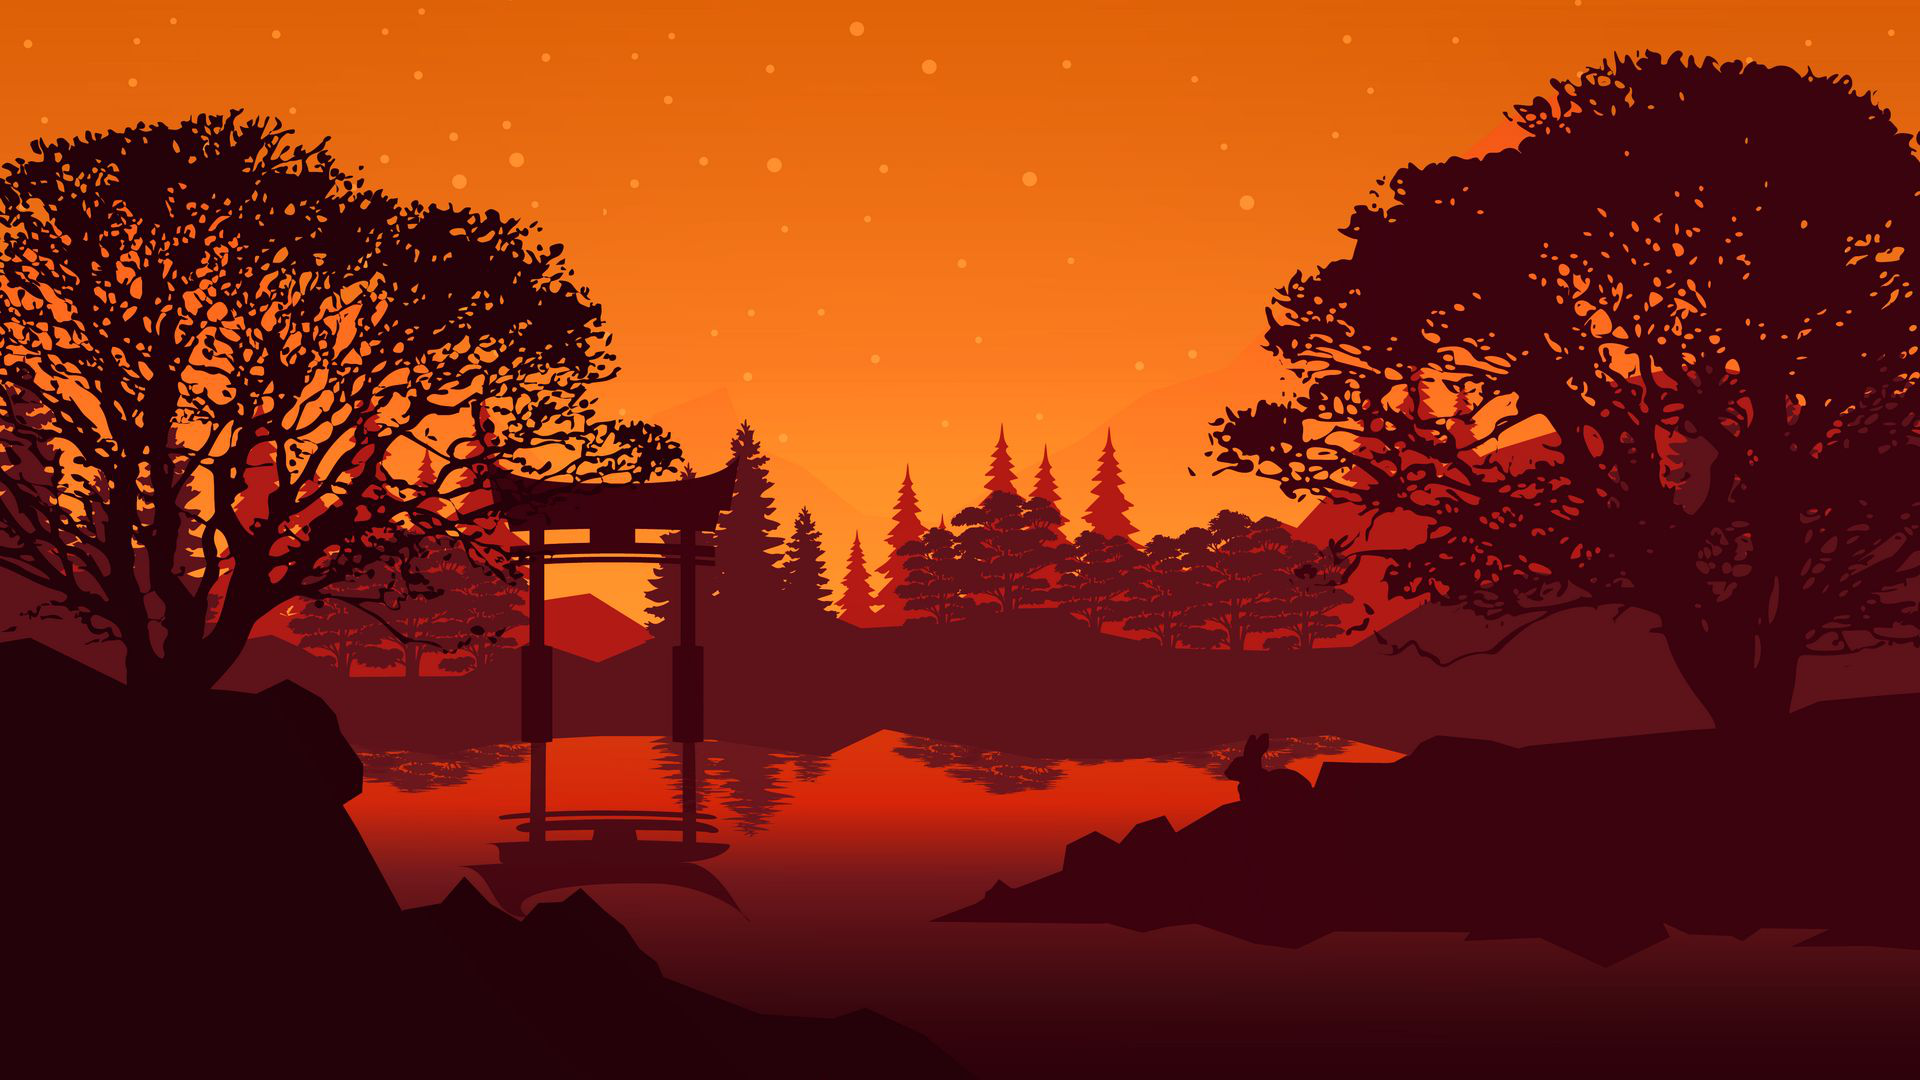

In [52]:
print(im.size)
im

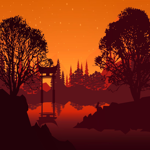

In [53]:
res_im = im.resize((150, 150))
res_im

In [54]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im).astype('float32')
np_res_im

array([[[221.,  96.,   6.],
        [221.,  96.,   6.],
        [221.,  96.,   6.],
        ...,
        [220.,  94.,   7.],
        [220.,  94.,   7.],
        [220.,  94.,   7.]],

       [[222.,  97.,   7.],
        [222.,  97.,   7.],
        [221.,  96.,   6.],
        ...,
        [219.,  93.,   6.],
        [219.,  93.,   6.],
        [219.,  93.,   6.]],

       [[222.,  97.,   7.],
        [222.,  97.,   7.],
        [222.,  97.,   7.],
        ...,
        [219.,  95.,   7.],
        [219.,  95.,   7.],
        [219.,  95.,   7.]],

       ...,

       [[ 35.,   2.,   9.],
        [ 35.,   2.,   9.],
        [ 35.,   2.,   9.],
        ...,
        [ 48.,   2.,  12.],
        [ 48.,   2.,  12.],
        [ 48.,   2.,  12.]],

       [[ 35.,   2.,   9.],
        [ 35.,   2.,   9.],
        [ 35.,   2.,   9.],
        ...,
        [ 47.,   1.,  11.],
        [ 47.,   1.,  11.],
        [ 47.,   1.,  11.]],

       [[ 35.,   2.,   9.],
        [ 35.,   2.,   9.],
        [ 35.,  

In [55]:
print(input_details[0]['shape'])
print(np_res_im.shape)

array([  1, 150, 150,   3])

In [57]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [58]:
print(output_data[0])

[0. 0. 1.]


In [88]:
print(output_data.shape)
print(output_data[0].shape)

(1, 3)

In [47]:
classification_prob = []
classification_label = []
total = 0
for index,prob in enumerate(output_data[0]):
    if prob != 0:
        classification_prob.append(prob)
        total += prob
        classification_label.append(index)

In [48]:
label_names = [line.rstrip('\n') for line in open("./docClassification_model_03.txt")]
label_names

['KK', 'KTP', 'NPWP']

In [49]:
found_labels = np.array(label_names)[classification_label]

In [50]:
import pandas as pd

df = pd.DataFrame(classification_prob/total, found_labels)
sorted_df = df.sort_values(by=0,ascending=False)
sorted_df

,0
NPWP,1.000000e+00
KTP,1.847613e-24


In [95]:
print(classification_prob)
print(classification_label)
print(output_data)
print(total)

[1.0]
[2]
[[0. 0. 1.]]
1.0
